## Problem statement: 

## Importing libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing dataset: 

In [74]:
data= pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Domain analysis: 

- There are five features namely customer id, gender, age, annual income, spending score.
- The data shows the basic details of the mall customers based on which the appropriate strategy 
could be adopted to improve the sales and profit of the business.
- Annual income is given in k$, and the spending score ranges between 1 and 100.

## Basic checks: 

In [4]:
data.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [5]:
data.tail(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
data.shape

(200, 5)

In [7]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# no null values
# only one categorical feature i.e., Gender

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


- Age:
    The minimum age is 18 and maximum is 70 and the average age is 38.
- Annual Income(k$):
    The minimum income is 15 and maximum is 137 and the average income is around 60.
- Spending Score (1-100):
    The minimum spending score is 1 and maximum is 99.
- The spread of data is minimum for all the features which is approximately less than 50.

In [13]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [15]:
# female is more than the male category in gender column.

## Exploratory Data Analysis: 

### Univariate analysis: 

In [16]:
# categorical column: Gender
# numerical columns :  Age , Annual Income (k$)  , Spending Score (1-100)

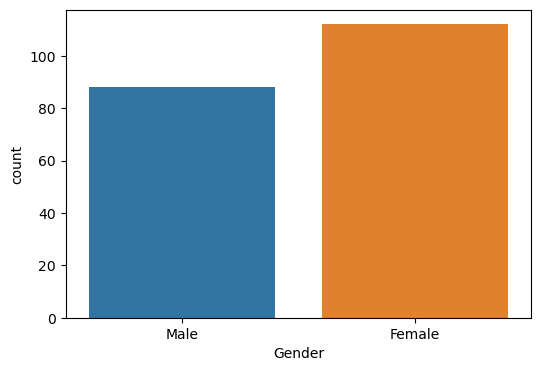

In [17]:
# Gender
plt.figure(figsize=(6,4))
sns.countplot(data= data, x= 'Gender')
plt.show()

In [18]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [24]:
female= (112/ 200)
print('female is', female)
print('male is 0.44')

female is 0.56
male is 0.44


#### Insights:
- Around 56% of gender feature is dominated by female category and 44% constitutes male category.

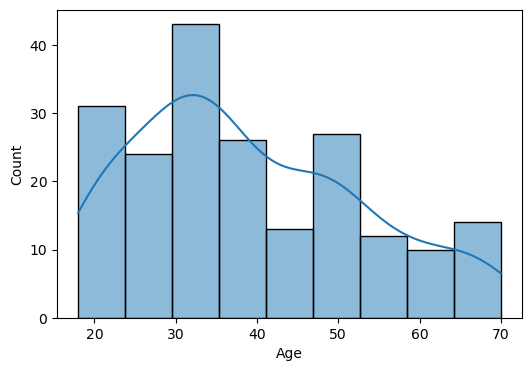

In [26]:
# Age

plt.figure(figsize=(6,4))
sns.histplot(data= data, x= 'Age', kde = True)
plt.show()

#### Insights:
-Age column has positively skewed distribution.

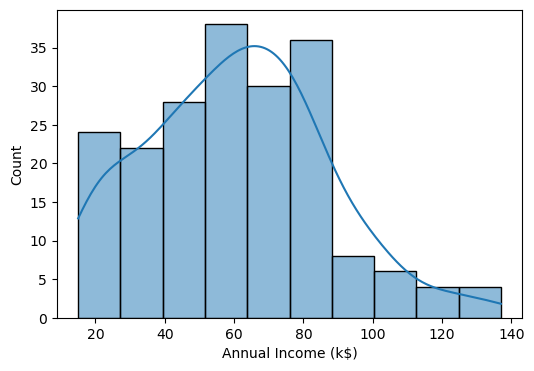

In [27]:
# Annual Income (k$)

plt.figure(figsize= (6,4))
sns.histplot(data= data, x= 'Annual Income (k$)', kde= True)
plt.show()

#### Insights:
- Annual income has positively skewed distribution.

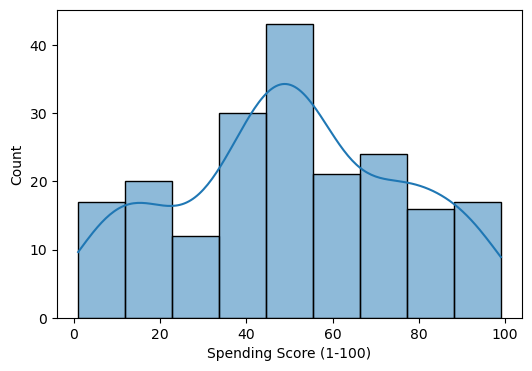

In [28]:
# Spending Score (1-100)

plt.figure(figsize=(6,4))
sns.histplot(data= data, x= 'Spending Score (1-100)', kde =True)
plt.show()

#### Insights:
- Spending score column roughly follows normal distribution.

### Bivariate analysis: 

<Axes: xlabel='Gender', ylabel='Age'>

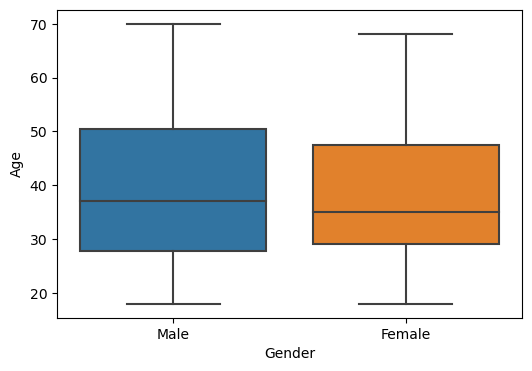

In [33]:
# Relationship between gender and age

plt.figure(figsize=(6,4))
sns.boxplot(data= data, x= 'Gender', y= 'Age')

#### Insights:
- Most of the male customers fall within the range of 28 to 50 years of age category.
- Most of the female customers fall within 30 to 48 age category.

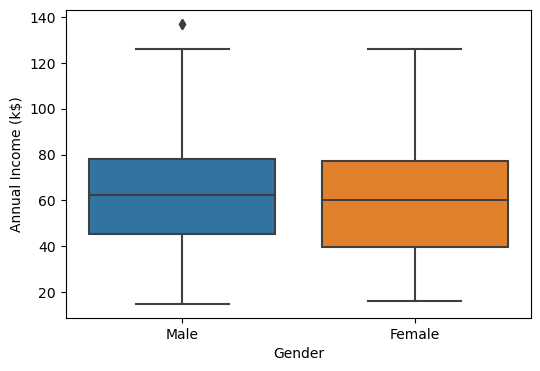

In [34]:
# Relationship between gender and annual income

plt.figure(figsize=(6,4))
sns.boxplot(data= data, x= 'Gender', y= 'Annual Income (k$)')
plt.show()

### Insights:
- The male category has their income range within 42k$ - 80k$. 
- The female customers have slightly higher range than the male customers , in 40k$ - 80k$.

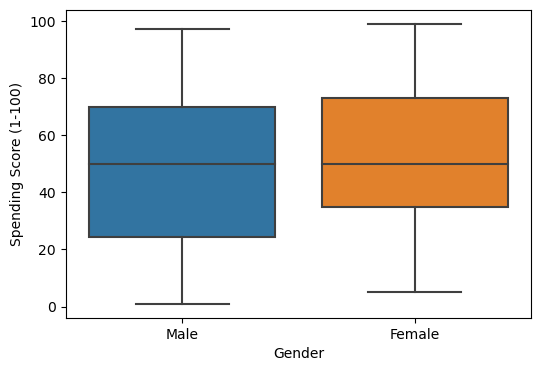

In [35]:
# Relationship between gender and Spending Score (1-100)

plt.figure(figsize=(6,4))
sns.boxplot(data= data, x= 'Gender', y= 'Spending Score (1-100)')
plt.show()

#### Insights:
- The spending score for female ranges from approximately 32 to 72.
- The threshold of spending score is higher for female than male since male scores 
fall within range of approx. 25 to 70.
- Eventhough the spread is higher for male , the higher spending score is reached 
by female customers.

In [36]:
# relationship between age and income , spending score

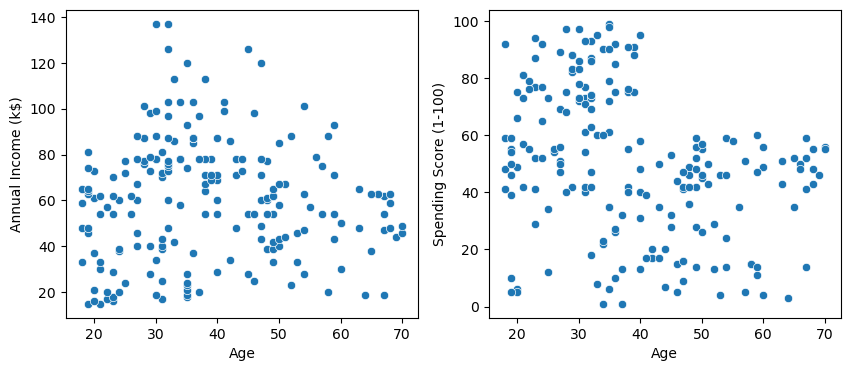

In [40]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.scatterplot(data= data, x='Age', y= 'Annual Income (k$)')

plt.subplot(122)
sns.scatterplot(data= data, x= 'Age', y = 'Spending Score (1-100)')
plt.show()

### Insights:
#### Age Vs Annual income :
- Age between 30 to 50 has reached the highest threshold of annual income range of around 100k$ - 140k$
but most of them falls within 60k$ -80k$ income range.
- Customers of age less than 30  has income range of 10k$ - 80k$.
- customers of age greater than 50 has income range of 15k$ - 100k$.
#### Inference:
- Hence the customers of age in the range of 30 to 50 years need to be highly targeted than the other age groups.

#### Age Vs spending score:
- Age group of 20 - 38 are the most spending customers than the rest of the category.
- Most of this age group has their spending score in the range of 40 -100.
- Most of the customers in the age group of 38 - 70 have their spending scores in the range of 40 - 60.
#### Inference:
- Therefore the customers of age group of 20 to 38 are likely to spend more than the remaining age groups. Hence age group > 38 needs to be focussed with attractive personalized discounts and coupons to increase the sales.

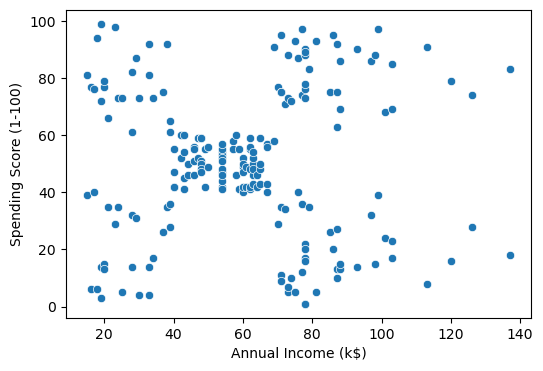

In [41]:
# Relationship between income and spending score.

plt.figure(figsize=(6,4))
sns.scatterplot(data=data, x= 'Annual Income (k$)', y= 'Spending Score (1-100)')
plt.show()

### Insights:
- Customers in the annual income group of 20k$ -40k$ and 70k$ - 100k$  have higher spending score.
- Customers within the annual income range of 40k$ - 70k$ have their spending score strictly restricted to the range of 40 - 60.

#### Inference:
- Customers in the income group of 40k - 60k dollars belong to the middle income group hence their spending score is confined in the average score of 40 - 60 range. Seasonal offers and festival discounts could help them spend more in the products.

### Pairplot


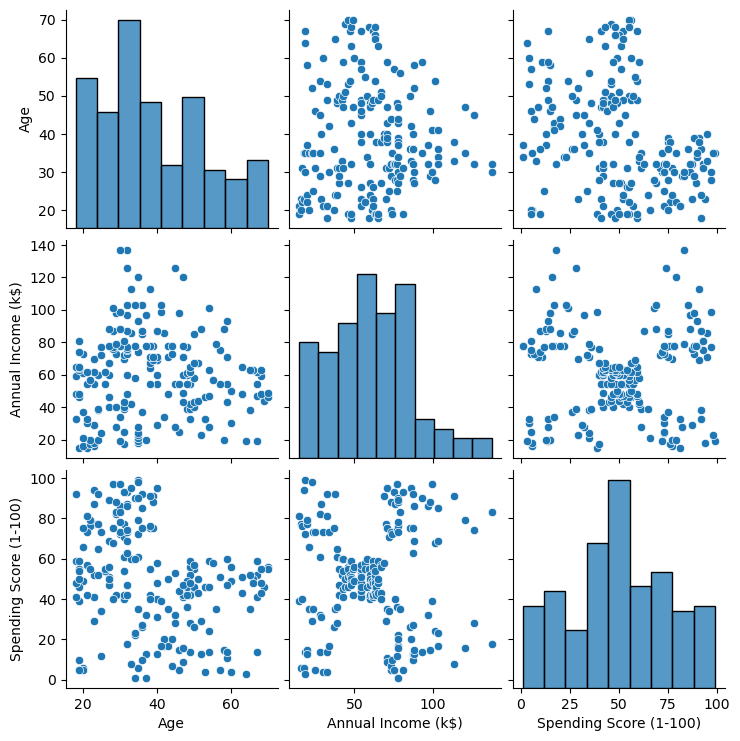

In [44]:
sns.pairplot(data= data.drop('CustomerID', axis=1))
plt.show()

### Insights:
- Customers of 20 - 40 age group constitutes the majority population and is the most spending category.
- Customers with very low income and very high income are likely to spend more than the middle income group.


## Data Preprocessing:


### Checking null values: 

In [45]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [75]:
# dropping irrelevant column

data.drop('CustomerID', axis =1, inplace = True)

In [76]:
data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [77]:
# checking duplicates
data.duplicated().sum()

0

### Checking outliers

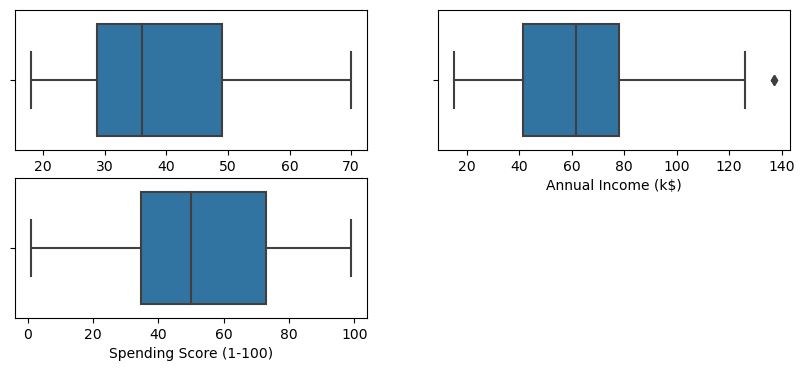

In [78]:
# Age, annual income, spending score

plt.figure(figsize = (10,4))
plt.subplot(221)
sns.boxplot(data= data, x='Age')

plt.subplot(222)
sns.boxplot(data= data, x='Annual Income (k$)')

plt.subplot(223)
sns.boxplot(data= data, x='Spending Score (1-100)')
plt.show()

<Axes: >

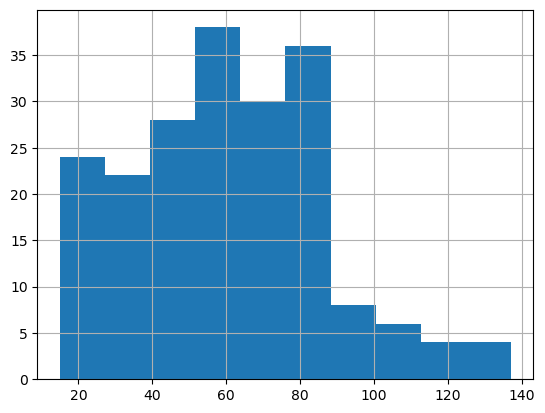

In [79]:
# Handling outliers
# Only annual income has outlier
# checking the distribution

data['Annual Income (k$)'].hist()

In [80]:
# skewed distribution- hence iqr method

q1= data['Annual Income (k$)'].quantile(0.25)
q3= data['Annual Income (k$)'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1- (1.5*iqr)
upper_limit =q3 + (1.5*iqr)
print('lower limit is', lower_limit)
print('upper limit is', upper_limit)

lower limit is -13.25
upper limit is 132.75


In [81]:
data.loc[data['Annual Income (k$)'] < lower_limit]

,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [82]:
data.loc[data['Annual Income (k$)'] > upper_limit]

,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,Male,32,137,18
199,Male,30,137,83


In [83]:
# replacing outliers with median
data.loc[data['Annual Income (k$)'] > upper_limit, 'Annual Income (k$)'] = data['Annual Income (k$)'].median()

## Encoding:


In [84]:
# Gender- nominal data so one-hot encoder

data['Gender']= pd.get_dummies(data['Gender'], drop_first= True)
data['Gender']

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: uint8

In [85]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40
...,...,...,...,...
195,0,35,120.0,79
196,0,45,126.0,28
197,1,32,126.0,74
198,1,32,61.5,18


## Scaling: 

In [87]:
from sklearn.preprocessing import StandardScaler
scaling= StandardScaler()
data[['Age','Annual Income (k$)','Spending Score (1-100)']] = scaling.fit_transform(data[['Age','Annual Income (k$)','Spending Score (1-100)']])
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,-1.424569,-1.788777,-0.434801
1,1,-1.281035,-1.788777,1.195704
2,0,-1.352802,-1.748853,-1.715913
3,0,-1.137502,-1.748853,1.040418
4,0,-0.563369,-1.708930,-0.395980
...,...,...,...,...
195,0,-0.276302,2.403201,1.118061
196,0,0.441365,2.642742,-0.861839
197,1,-0.491602,2.642742,0.923953
198,1,-0.491602,0.067670,-1.250054


## Features selection: 

In [88]:
data.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.024997,-0.058109
Age,0.060867,1.000000,0.004013,-0.327227
Annual Income (k$),0.024997,0.004013,1.000000,0.010007
Spending Score (1-100),-0.058109,-0.327227,0.010007,1.000000


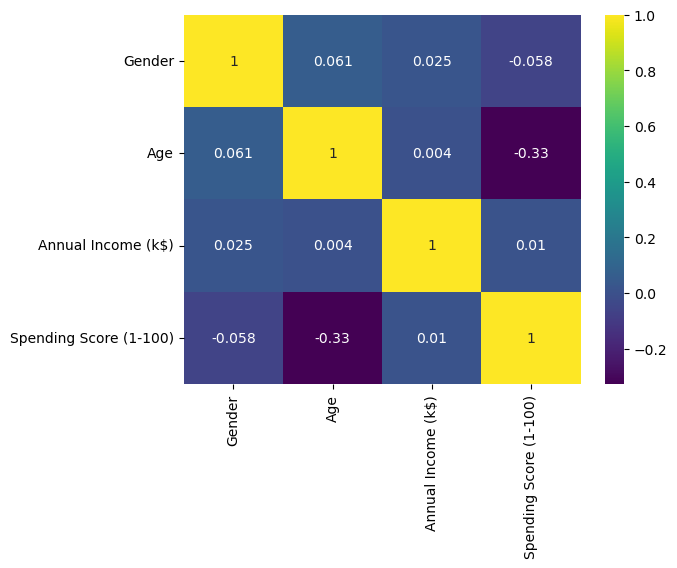

In [91]:
sns.heatmap(data.corr(), annot= True, cmap= 'viridis')
plt.show()

In [ ]:
# Age and spending score has less correlation with each other.

## Model Building:

In [ ]:
# whole data is the input for the model training

In [94]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 5, random_state= 17)
model.fit(data)

KMeans(n_clusters=5, random_state=17)

In [96]:
model.cluster_centers_ # 5 clusters (hence five centroids) and 4 iterations

array([[ 0.40740741, -0.98067852, -0.7470666 ,  0.46744035],
       [ 0.4       ,  0.5310735 , -1.31967447, -1.23646671],
       [ 0.45      , -0.42880597,  0.97443518,  1.21608539],
       [ 0.42553191,  1.20484056, -0.21646659, -0.05236781],
       [ 0.51282051,  0.07333084,  0.97260534, -1.19729675]])

In [98]:
labels = model.labels_
labels

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0,
       1, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 4, 0, 0, 0, 3, 3, 3, 3, 0, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 3, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [99]:
data[['labels']] = pd.DataFrame(labels)
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),labels
0,1,-1.424569,-1.788777,-0.434801,0
1,1,-1.281035,-1.788777,1.195704,0
2,0,-1.352802,-1.748853,-1.715913,1
3,0,-1.137502,-1.748853,1.040418,0
4,0,-0.563369,-1.708930,-0.395980,0
...,...,...,...,...,...
195,0,-0.276302,2.403201,1.118061,2
196,0,0.441365,2.642742,-0.861839,4
197,1,-0.491602,2.642742,0.923953,2
198,1,-0.491602,0.067670,-1.250054,4


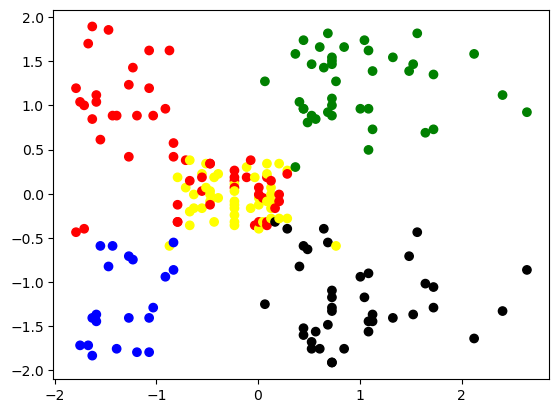

In [101]:
color_palette = np.array(['red', 'blue', 'green', 'yellow', 'k'])
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], color= color_palette[labels])

### Elbow method to find optimum k  value: 

In [103]:
wcss = []

for i in range(1,11):
    elbow = KMeans(n_clusters= i, random_state= 17)
    elbow.fit(data)
    wcss.append(elbow.inertia_)

In [104]:
wcss

[1088.2349999999997,
 608.7470845809412,
 417.9405360442322,
 301.733621227105,
 215.99279389241119,
 185.5347304374006,
 169.12265916772924,
 152.69863810370492,
 143.27829216911869,
 132.38809596924287]

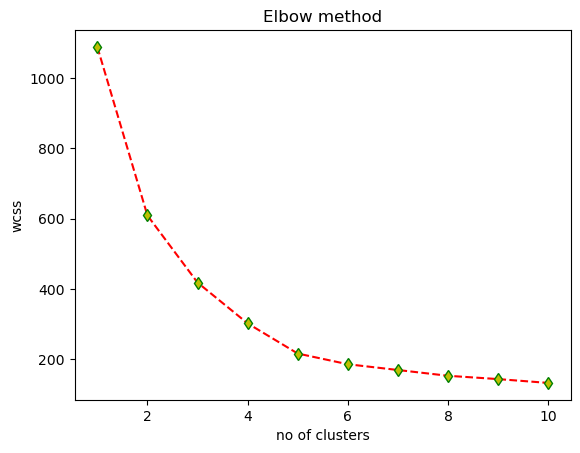

In [106]:
plt.plot(range(1,11), wcss, 'd--r', mec = 'g', mfc = 'y')
plt.title('Elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [107]:
# if k is 4

model1 = KMeans(n_clusters = 4, random_state= 15)
model1.fit(data)

KMeans(n_clusters=4, random_state=15)

In [109]:
model1.cluster_centers_ # four centroids, five iterations

array([[ 0.45      , -0.42880597,  0.97443518,  1.21608539,  2.        ],
       [ 0.51282051,  0.07333084,  0.97260534, -1.19729675,  4.        ],
       [ 0.38095238, -0.86866173, -0.83758121,  0.24611637,  0.14285714],
       [ 0.44827586,  1.18996596, -0.41623102, -0.30093403,  2.62068966]])

In [111]:
labels1 = model1.labels_
labels1

array([2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 1, 2, 2, 2, 3, 3, 3, 3, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [112]:
data[['labels1']] = pd.DataFrame(labels1)
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),labels,labels1
0,1,-1.424569,-1.788777,-0.434801,0,2
1,1,-1.281035,-1.788777,1.195704,0,2
2,0,-1.352802,-1.748853,-1.715913,1,2
3,0,-1.137502,-1.748853,1.040418,0,2
4,0,-0.563369,-1.708930,-0.395980,0,2
...,...,...,...,...,...,...
195,0,-0.276302,2.403201,1.118061,2,0
196,0,0.441365,2.642742,-0.861839,4,1
197,1,-0.491602,2.642742,0.923953,2,0
198,1,-0.491602,0.067670,-1.250054,4,1


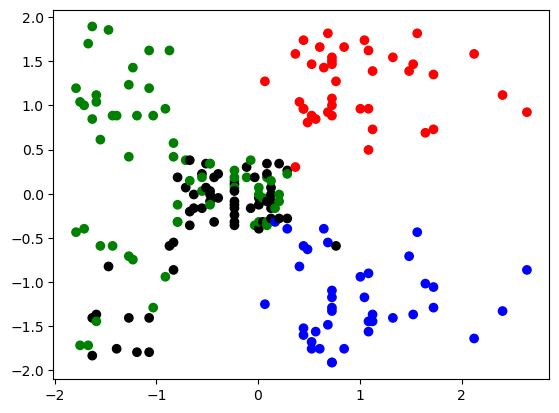

In [125]:
palette = np.array(['red', 'blue', 'g', 'k'])
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], color = palette[labels1])

## conclusion:
 The customers are formed into four different clusters based on the given details. The clusters with average spending score has to be focussed to attract more sales , clusters with low spending score needs to be attracted with discounts and coupons and high spending score clusters has to be retained efficiently.